In [1]:
from data_generation import generate_batch
from polynomial_regression import PolyRegNp, PolyRegTorch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

D:\py385_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#https://github.com/plotly/datasets
with open("monthly-milk-production-pounds.csv", 'r') as ft:
    header = ft.readline() # read only first line; returns string
    header_list = header.split(',') # returns list
print('Column names -> ', header_list)

Column names ->  ['Month', 'Monthly milk production (pounds per cow)\n']


In [3]:
df = pd.read_csv('monthly-milk-production-pounds.csv', header=0, parse_dates=True)
df.head(5)

,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


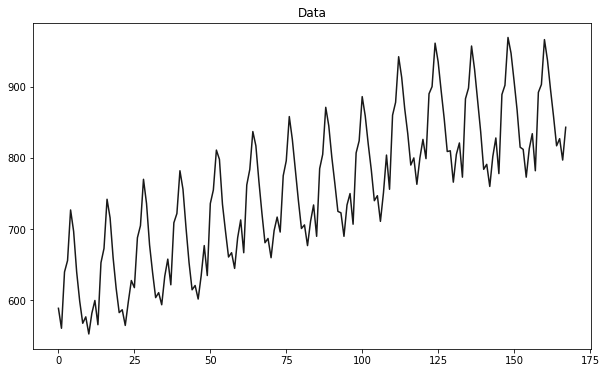

In [4]:
#X = np.array([i%12 for i in range(0, len(df))])
X = np.array([i for i in range(0, len(df))])
y = df[df.columns[1]].values
#X, y = generate_batch(batch_size=200, seed=0)
plt.figure(figsize=(10,6))
plt.title('Data')
plt.plot(y, alpha=0.9, c='k')

# Polynomial Regression

polynomial regression model for a single predictor, X, is:

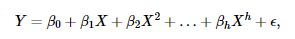

where h is called the degree of the polynomial. For lower degrees, the relationship has a specific name (i.e., h = 2 is called quadratic, h = 3 is called cubic, h = 4 is called quartic, and so on). 

Although this model allows for a nonlinear relationship between Y and X, polynomial regression is still considered linear regression since it is linear in the regression coefficients β1, β2,..., βh!

https://online.stat.psu.edu/stat462/node/158/#:~:text=Although%20this%20model%20allows%20for,.%20.%20.%20%2C%20%CE%B2%20h%20

https://stats.stackexchange.com/questions/92065/why-is-polynomial-regression-considered-a-special-case-of-multiple-linear-regres

## Lineer Regression Assumption:

 data = model + noise 


noise is a kind of gaussian or normal distribution so we need to check the residual by using the normality test (Shapiro-Wilk) but first let's look at trend.

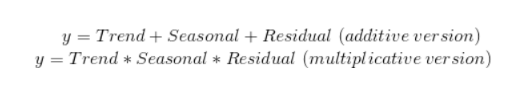

https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051

# Trend Analysis

X.shape -> (168,) 

X_scaled.shape -> (168, 1)

y.shape -> (168, 1)

In [5]:
reg = PolyRegNp(X,y)
X_scaled, y = reg.feature_scaling()
coef = reg.fit(degree=1)
m, b = coef[0], coef[1]
y_pred = reg.predict()

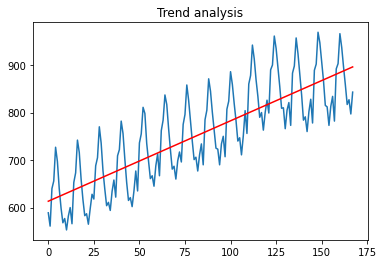

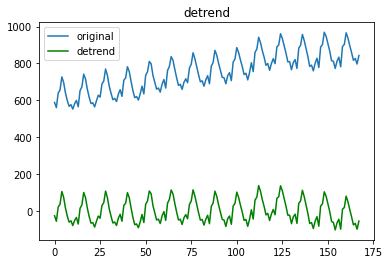

In [6]:
plt.figure()
plt.title('Trend analysis')
plt.plot(y)
plt.plot(y_pred, c='red')


detrend = (y - np.array(y_pred).reshape(-1,1)).flatten()
plt.figure()
plt.title('detrend')
plt.plot(y)
plt.plot(detrend, c='green')
plt.legend(['original', 'detrend'])

# Seasonality

In [7]:
reg = PolyRegNp(X,detrend)
X_scaled, detrend = reg.feature_scaling()
coef_detrend = reg.fit(degree=4)
y_pred_detrend = reg.predict()

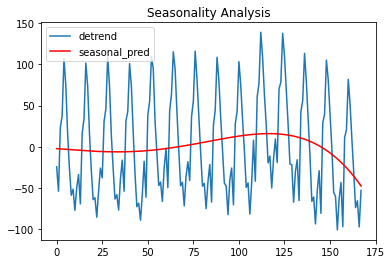

In [8]:
plt.figure()
plt.title('Seasonality Analysis')
plt.plot(detrend)
plt.plot(y_pred_detrend, c='red')
plt.legend(['detrend', 'seasonal_pred'])

Text(0.5, 0.98, 'Frequency Decomposition')

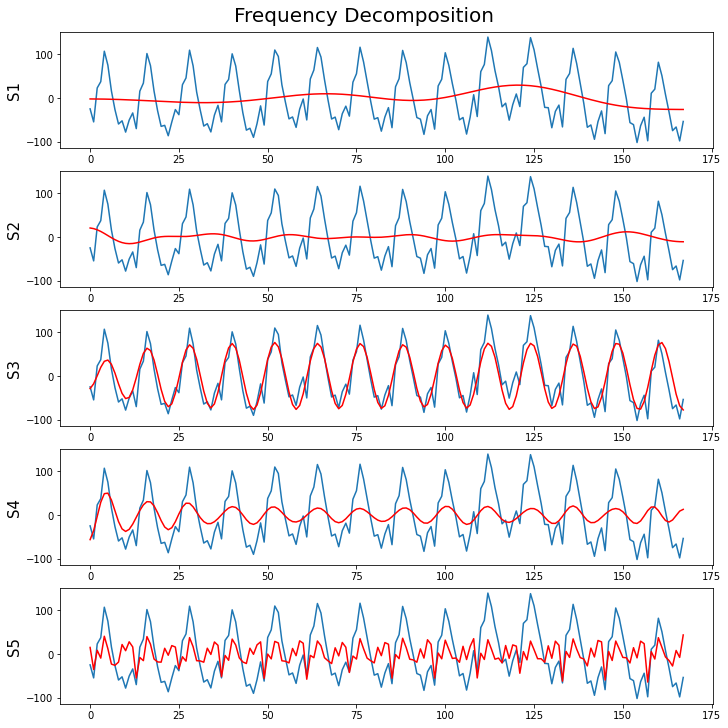

In [9]:
from emprical_wavelet_transform import EWT1D

#Splitting Data into N Sublayers using EWT
N = 5
data = EWT1D(detrend.flatten(), N = N)[0]
data = data.T

fig, ax = plt.subplots(N, 1, constrained_layout = True, figsize = (10, 10))
for i in range(N):
    ax[i].plot(detrend)
    ax[i].plot(data[i],c='r')
    ax[i].set_ylabel('S{}'.format(i+1), fontsize = 15)
fig.suptitle('Frequency Decomposition', fontsize = 20)


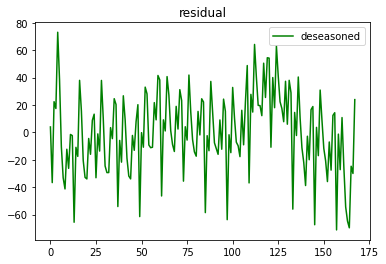

In [10]:
#residual
deseasoned = detrend.flatten() - np.array(data[2]).reshape(-1,1).flatten()
#deseasoned = detrend.flatten() - np.array(y_pred_detrend).reshape(-1,1).flatten()

plt.figure()
plt.title('residual')
plt.plot(deseasoned, c='green')
plt.legend(['deseasoned'])

# Shapiro-Wilk Test

The Shapiro-Wilk test is a statistical test of the hypothesis that the distribution of the data as a whole deviates from a comparable normal distribution.

If the test is non-significant (p>. 05) it tells us that the distribution of the sample is not significantly different from a normal distribution.

https://uc-r.github.io/assumptions_normality#:~:text=The%20Shapiro%2DWilk%20test%20is,different%20from%20a%20normal%20distribution.

In [11]:
from scipy import stats
val, pval = stats.shapiro(deseasoned)
if pval > 0.05:
    print('normal distribution')
else:
    print('different from a normal distribution')
print ('p-value =', pval)

normal distribution
p-value = 0.20493392646312714


# now fit 4th polynomial regression to all data

In [12]:
reg = PolyRegNp(X,y)
X_scaled, y = reg.feature_scaling()
coef = reg.fit(degree=4)
y_pred_d4 = reg.predict()

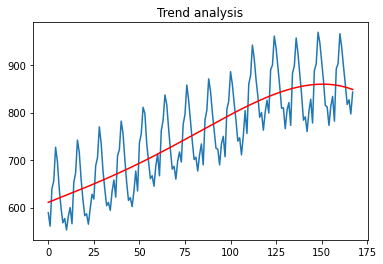

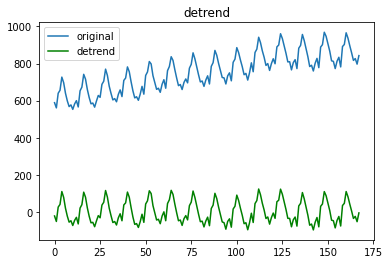

In [13]:
plt.figure()
plt.title('Trend analysis')
plt.plot(y)
plt.plot(y_pred_d4, c='red')


detrend = (y - np.array(y_pred_d4).reshape(-1,1)).flatten()
plt.figure()
plt.title('detrend')
plt.plot(y)
plt.plot(detrend, c='green')
plt.legend(['original', 'detrend'])

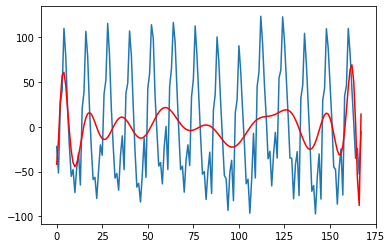

In [14]:
#polynomial regression for residual as standart deviation formula 
sd_y = y.flatten()-np.array(y_pred_d4).flatten()
reg = PolyRegNp(X,sd_y)
X_scaled, sd_y = reg.feature_scaling()
coef = reg.fit(degree=20)
sd_y_pred = reg.predict()

plt.figure()
plt.plot(y.flatten()-np.array(y_pred_d4).flatten())
plt.plot(sd_y_pred, c='red')

# Quantile Regression

Epoch 500: 35.60024642944336
Epoch 1000: 35.588951110839844
Epoch 1500: 35.626033782958984


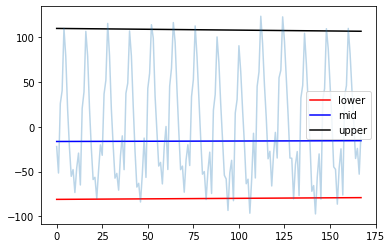

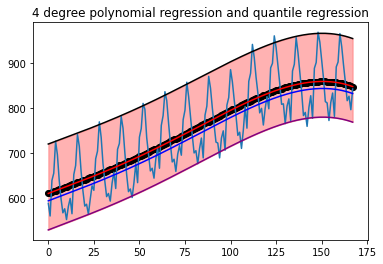

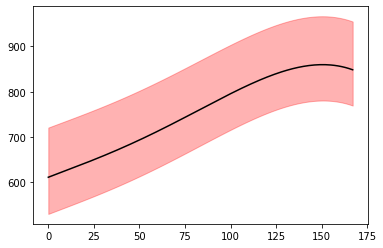

In [16]:
from quantile_regression import QuantileLoss, Learner, QuantileLoss
from quantile_regression import q_model
from functools import partial
from itertools import chain
import torch
import torch.nn as nn

# Instantiate model
quantiles = [.05, .5, .95]
model = q_model(quantiles, dropout=0.1)
loss_func = QuantileLoss(quantiles)
learner = Learner(model, partial(torch.optim.Adam, weight_decay=1e-6), loss_func = loss_func, device="cpu")#cuda:0

# Run training
#https://stackoverflow.com/questions/56741087/how-to-fix-runtimeerror-expected-object-of-scalar-type-float-but-got-scalar-typ

X_scaled = X_scaled.astype(np.float32)
sd_y = sd_y.astype(np.float32)
epochs = 1500
learner.fit(X_scaled, sd_y, epochs, batch_size=10)


predictions = learner.predict(X_scaled)

plt.figure()
plt.plot(predictions[:, 0],c='red')
plt.plot( predictions[:, 1],c='blue')
plt.plot( predictions[:, 2],c='k')
plt.plot(y.flatten()-np.array(y_pred_d4).flatten(), alpha=0.3)
plt.legend(['lower','mid','upper'])

plt.figure()
plt.title('4 degree polynomial regression and quantile regression')
plt.plot(y)
plt.plot( y_pred_d4, c='red')
plt.plot(y_pred_d4 + predictions[:, 0],c='purple')
plt.plot(y_pred_d4 +  predictions[:, 1],c='blue')
plt.plot(y_pred_d4 + predictions[:, 2],c='k')
#fill_between quantiles
idx = np.argsort(X.flatten())
plt.fill_between(X.flatten()[idx], np.array(y_pred_d4)[idx] + predictions[:, 0][idx],  np.array(y_pred_d4)[idx] + predictions[:, 2][idx], color='red', alpha=0.3)
plt.scatter(X, np.array(y_pred_d4).flatten() , c ='k')


plt.figure()
idx = np.argsort(X.flatten())
plt.fill_between(X.flatten()[idx], np.array(y_pred_d4)[idx] + predictions[:, 0][idx],  np.array(y_pred_d4)[idx] + predictions[:, 2][idx], color='red', alpha=0.3)
plt.plot(np.array(y_pred_d4).flatten() , c ='k')
plt.show()


[1.]
[1.]
[0.]
[0.]
[17274.47]
[17274.47]
[131.43236762541093]


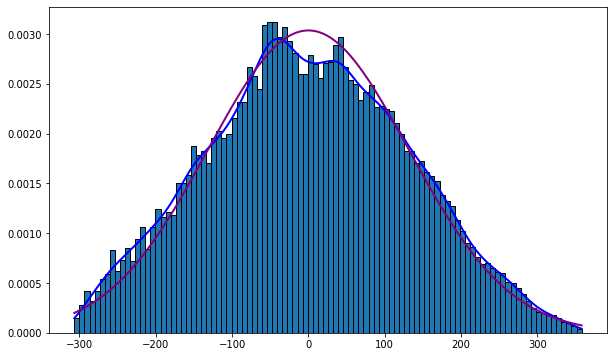

In [27]:
from sklearn import mixture
from scipy import stats

def gaussian(x, mu, sig):#same with sts.norm.pdf()
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

#Y = y - np.array(y_pred_d4).flatten()
Y = y.flatten() - np.array(y_pred_d4 +  predictions[:, 1]).flatten()
Y = Y.reshape(-1, 1)

N=1
g = mixture.GaussianMixture (n_components=N)
g.fit(Y)
weights = np.round(g.weights_, 2)
print(weights)
weights[::-1].sort()
print(weights)

means = np.round(g.means_, 2).flatten()
print(means)
means[::-1].sort()
print(means)

covs = np.round(g.covariances_, 2).flatten()
print(covs)
covs[::-1].sort()
print(covs)


cov = g.covariances_
std_devs = [ np.sqrt(  np.trace(cov[i])/N) for i in range(0,N) ]
print(std_devs)


data = Y.reshape(-1,1)# (512,) -> (512,1) 
h,e = np.histogram(data, bins=100, density=True)
x = np.linspace(e.min(), e.max(), y.shape[0])

plt.figure(figsize=(10,6))

plt.bar(e[:-1], h, width=np.diff(e), ec='k', align='edge', label='histogram')
kde = stats.gaussian_kde(data.reshape(1,-1))
plt.plot(x, kde.pdf(x), c='b', lw=2, label='KDE')

plt.plot(x, gaussian(x, means[0],std_devs[0]), c='purple', lw=2, label='gauss0')

distribution_random_samples = np.array([stats.norm.rvs(means[0],std_devs[0]) for i in range(y.shape[0])])
quant_diff = np.abs(predictions[:, 0] - predictions[:, 2])
z_s = stats.zscore(quant_diff, axis=None)

plt.figure(figsize=(10,3))
plt.scatter(X, y)
plt.scatter(X, np.array(y_pred_d4 +  predictions[:, 1] ).flatten() , c ='k')
#plt.scatter(X, np.array(y_pred_d4 +  predictions[:, 1]).flatten() + distribution_random_samples * z_s  , c ='red', alpha = 0.3)
plt.scatter(X, np.array(y_pred_d4 +  predictions[:, 1]).flatten() + distribution_random_samples , c ='red', alpha = 0.4)